# BASİT DOĞRUSAL REGRESYON

### Veri seti - Advertising
### http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

In [1]:
import pandas as pd 
df = pd.read_csv("verisetleri\Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
# Yukarıdaki verilerde index numarasıda veri olarak gösterilmektedir. Bunu gidermek için aşağıdaki işlem yapılmalıdır. iloc ile seçim işlemi yapmamız gerekmektedir
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Veri setinde bir şirketin tv, radio, gazete reklam harcamaları sonrasında satışların ne şekilde oluştuğu ifade edilmektedir. sales bağımlı değişken ve diğerleri bağımsız değişkendir
# Doğrusal regresyon yaptığımız için bağımsız değişkenlerden bir tanesini seçeceğiz

# Basit doğrusal regresyon ve Çoklu Doğrusal Regresyon çok geniş bir literatürdür

# Ekonomometri bölümü teknik olarak Doğrusal Regresyon modelleri üzerine kurulmuş bir bölümdür. İktisat teorisiyle istatistik teorisini kesiştiren bir bölümdür


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


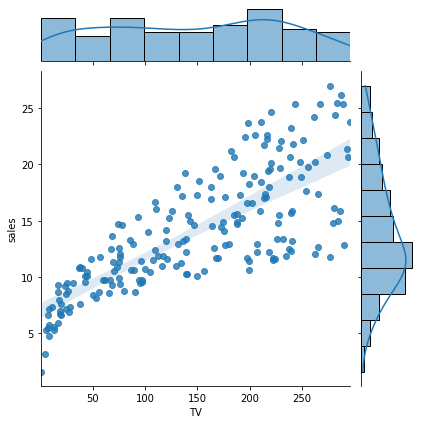

In [9]:
import seaborn as sns
# Aralarındaki ilişkinin değerlendirilmesi
sns.jointplot(x="TV", y="sales", data = df, kind = "reg");

In [10]:
# Modelleme
from sklearn.linear_model import LinearRegression
# Bağımsız değişken x ile bağımlı değişkeni y ile ifade edeceğiz.

In [11]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
y = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [13]:
# LinearRegression() modelinin örneklenmesi - initalize edilmesi - model nesnesinin oluşturulması
reg = LinearRegression()

## Modelin kurulması

In [16]:
model = reg.fit(X, y)

In [17]:
print(model)

LinearRegression()


In [18]:
str(model)

'LinearRegression()'

In [19]:
dir(model)


['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [20]:
# Buradaki 'intercept_' sabittir. B0 buradan alınabilir. 'coer_' ise katsayı demektir yani B1 buradan alınabilir

In [21]:
model.intercept_

array([7.03259355])

In [22]:
model.coef_

array([[0.04753664]])

In [23]:
# r kare ifadesi : Modelin skorunu ifade eder.
# r kare : Bağımlı değişkendeki değişikliğin, bağımsız değişkenlerce açıklanma yüzdesidir.
model.score(X,y)

0.611875050850071

In [24]:
# r kara : Yani bu örnekte satışlardaki değişikliğin yüzde 60 ı bağımsız değişkence açıklanmaktadır. Satışların içerisinde bir vayans var bir değişim var, işte bu satış değişkeninin içerisindeki değişimi burada kullanmış olduğumuz TV değişkeni,bu değişimin %60 ını açıklamaktadır.

# R KARE : Bağımsız değişkenin bağımlı değişkene etki ettiği yüzdedir. Önemlidir. Modelin SCORE udur.

# MODELİN TAHMİN ETME İŞLEMİ

In [25]:
# B0 ve B1 değerlerini bulmak için kullanılan farklı yöntemler var
# scitlearn kütüphanesini kullancağız. 
# Parametre çıktılarının değerlendirilmesi ve yorumlanması değişebilir. 
# Biz modellerin başarılarına odaklanacağız. Modellerin hiperparametrelerini optimize etmeye odaklanacağız. Daha çok yüksek başarılı tahminler yapmaya çalışacağız. 
# Burada ele alacak olduğumuz konuları istatistik literatüründeki neden sonuç bağlamında değil de daha çok optimizasyon odaklı yüksek tahmin başarısı odaklı gerçeleştiriyor olacağız.

In [ ]:
# regplot -> regresyon görselleştirmesi
# ci=None -> etraflarına güven aralığı koyma
# scatter_kws -> renklendirme ayarları
# plt.xlim(-10, 310)   x ekseni -10 ile 310 arasında olacak
# plt.ylim(bottom=0);  y ekseni 0 dan başlayacak

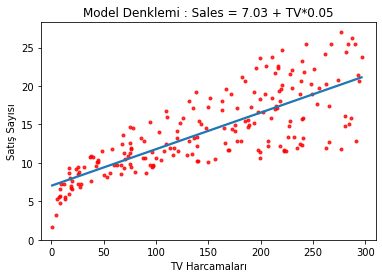

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt 
grafik = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
grafik.set_title("Model Denklemi : Sales = 7.03 + TV*0.05")
grafik.set_ylabel("Satış Sayısı")
grafik.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0);

In [27]:
# Yukarıdaki grafik saçılım grafiğidir. Mavi çizgi bulmuş olduğumuz model denklemidir.

### Sales = 7.03 + 0.05*TV

In [28]:
# 165 birimlik tv reklamı yaparsak satışlara ne kadar etki eder
7.03 + 0.05*165

15.280000000000001

In [29]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [30]:
model.predict([[165]])

array([[14.87613922]])

In [31]:
# Birden fazla tahmin işlemi

In [32]:
yeni_veri = [[5], [15], [30]]

In [33]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

### grafikte olmayan değerlerde gözlemlenebilir. 400 500 gibi

# ARTIKLAR (hata) VE MAKİNE ÖĞRENMESİNDEKİ ÖNEMİ

In [35]:
#  MSE : Hata Kareler Ortalaması
#  RMSE : Hata Kareler Ortalaması Karekökü

In [36]:
# Optimizasyon yaklaşımları
# Amacımız, gerçek değerler ile tahmin edilen değerler arasındaki farkı minimuma indirmek.

In [37]:
# Gerçek değerler
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [38]:
# Tahmin edilen değerler
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [39]:
y[0:10]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [40]:
model.predict(X)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [41]:
gercek_y = y[0:10]

In [42]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [43]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis=1)

In [45]:
hatalar.columns = ["gercek_y", "tahmin_edilen_y"]

In [46]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [47]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [48]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [49]:
# MSE hata hesaplaması - hata kareleri
hatalar["hata_kareler"] = hatalar["hata"]**2

In [50]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [53]:
# Hata Kareler Ortalaması - on tane değer için manuel olarak hesaplanması
import numpy as np 
np.mean(hatalar["hata_kareler"])

9.290350329638102

In [ ]:
# son